# Methods for Data Science Coursework 1

The following notebook will explore regression and classification techniques on the datasets downloaded from the course page. 

CID:01063446


## Regression

In this first section we will explore regression techniques. We will predict median house prices given a set of unlabelled feature data.

In [103]:
#import necessary modules
import numpy as np #linear algebra
import pandas as pd #dataframes
import matplotlib.pyplot as plt #visualisation

import seaborn as sns; sns.set_theme() #extra plotting and theme

In [104]:
#load dataspace
reg_test = pd.read_csv("/home/juser/Downloads/regression_test(1).csv",header=None) #modify for gta?
reg_train = pd.read_csv("/home/juser/Downloads/regression_train(1).csv",header=None) #no headers in dataset

We first load our data as a pandas dataframe and we can see the first rows below. Note that the final column is our response (median house price) and all other columns are variables.

This data was given to us in an augmented form; there is a column of 1s in the first column index. This is important since linear regression requires an intercept column, so we will remember to not augment this matrix.


In [105]:
reg_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,-0.413447,-0.487722,0.115738,0.115735,0.158124,0.984960,0.797449,-0.773684,0.985161,-0.803212,1.176466,0.441052,-0.983048,0.158124,1.176469,-0.487723,-0.773598,23.9
1,1.0,-0.412788,-0.487722,-1.034027,-1.034035,-0.386091,0.819700,0.207144,-0.418203,0.819617,-0.666608,-0.857929,0.379323,-0.803625,-0.386091,-0.857939,-0.487723,-0.418305,29.9
2,1.0,-0.387983,-0.487722,-0.211099,-0.211084,0.261784,-0.510932,-0.923682,-0.671859,-0.511320,-0.102376,0.344213,0.441052,0.131334,0.261784,0.344218,-0.487727,-0.671863,24.5
3,1.0,-0.347952,-0.487722,-0.720322,-0.720323,-0.412006,0.846768,0.324494,-0.248591,0.846699,-0.601276,-0.488039,0.369674,-0.381702,-0.412006,-0.488023,-0.487722,-0.248524,27.5
4,1.0,-0.330562,-0.487722,-0.437258,-0.437249,-0.144217,0.299699,0.918355,0.313581,0.299802,-0.601276,1.176466,0.342811,0.020597,-0.144217,1.176460,-0.487724,0.313542,18.4


In [106]:
print('mean',np.mean(reg_train.iloc[:,2]),'var', np.var(reg_train.iloc[:,2]))

mean 0.0574305156734839 var 1.1350658446264523


Something interesting about the data we have been given is that the explanatory variables seem to be approximately standard normal; they have variance 1 and mean 0. The response variable is not though. This data has also been given to us in augmented form; there is a column of 1s at the start. This column is used to calculate intercept values.

This is worth mentioning now because some of our techniques later will require standardised data and so we will have to decide if we want to normalise the above data.

Our next step is to separate the data into explanatory and response variables. This is just done by separating the last column from the main dataset

In [107]:
xr_train = reg_train.iloc[:,:-1] #select all but last column
xr_test = reg_test.iloc[:,:-1] #select all but last column

xr_train.head() #checking we removed the last column

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,-0.413447,-0.487722,0.115738,0.115735,0.158124,0.984960,0.797449,-0.773684,0.985161,-0.803212,1.176466,0.441052,-0.983048,0.158124,1.176469,-0.487723,-0.773598
1,1.0,-0.412788,-0.487722,-1.034027,-1.034035,-0.386091,0.819700,0.207144,-0.418203,0.819617,-0.666608,-0.857929,0.379323,-0.803625,-0.386091,-0.857939,-0.487723,-0.418305
2,1.0,-0.387983,-0.487722,-0.211099,-0.211084,0.261784,-0.510932,-0.923682,-0.671859,-0.511320,-0.102376,0.344213,0.441052,0.131334,0.261784,0.344218,-0.487727,-0.671863
3,1.0,-0.347952,-0.487722,-0.720322,-0.720323,-0.412006,0.846768,0.324494,-0.248591,0.846699,-0.601276,-0.488039,0.369674,-0.381702,-0.412006,-0.488023,-0.487722,-0.248524
4,1.0,-0.330562,-0.487722,-0.437258,-0.437249,-0.144217,0.299699,0.918355,0.313581,0.299802,-0.601276,1.176466,0.342811,0.020597,-0.144217,1.176460,-0.487724,0.313542


In [108]:
yr_train = reg_train.iloc[:,-1] #select last column
yr_test = reg_test.iloc[:,-1]
yr_train.head() #check our y data is ok


0    23.9
1    29.9
2    24.5
3    27.5
4    18.4
Name: 18, dtype: float64

### Linear Regression

We will try modelling this data with linear regression first. The code below calculates the beta coefficients by solving the system of equations: $$X^T X \cdot \beta = X^T y $$

Where X is our matrix of explanatory variables, y is the response variable.

This is known as the normal equations and the solution to this is a vector of beta coefficients that will allow us to make predictions by dotting the feature matrix with this vector. 

In [109]:
N = xr_train.shape[0] #dimension error check


beta_ml = np.linalg.solve(xr_train.T @ xr_train, xr_train.T @ yr_train) #parameters

resid = yr_train - xr_train@beta_ml #calculate residuals
MSE_li = np.mean(resid**2) #MSE linear reg. in sample

resid = yr_test - xr_test@beta_ml
MSE_lo = np.mean(resid**2) #out of sample MSE

print('betas:',beta_ml,'in sample MSE:',MSE_li,'out of sample MSE:',MSE_lo)

betas: [ 2.25185999e+01 -6.18339892e-01  7.88560025e+03 -4.57658189e+04
  4.57656497e+04  1.00185561e+09  9.70965629e+02 -1.66699447e-01
  1.25170699e+03 -9.67838200e+02 -4.60019424e-02 -5.58053401e+03
  7.41926871e-01 -3.71280101e+00 -1.00185561e+09  5.57880022e+03
 -7.88446966e+03 -1.25520057e+03] in sample MSE: 24.382057495899513 out of sample MSE: 19.544073285332516


In sample MSE is higher than out of sample MSE. This means that the model is fitting  worse to the data that it was trained on, than some data it has never seen. This is quite unusual, especially with OLS linear regression which often overfits to the training set ( it has good MSE for training data, but not as good MSE for test data).

Potential reasons for this would be that the test data just happens to have a lot less variability (it has easier examples to predict) than the training data. Our training data might also be not very well balanced and harder to predict most of the cases well. The training data could also be quite sparse in the feature space. In other words, the training data points are scattered far from each other and so a lot of the points will inevitably end up far from the line we fit.

Some of these beta values are very large (order e+09), which means these variables have a huge influence on our predicted value. Larger coefficient values can suggest that those variables are very important, but in this case there is a chance it results from overfitting the sparse or noisy training set. Overall, we would conclude that the model is not particularly helpful. 


### Ridge regression

Our next method will be ridge regression. Ridge regression should perform better than linear regression because it shrinks the beta coefficients. This is useful since smaller beta values means less variability in the prediction. In other words, if one beta coefficient is large, a small change in the associated explanatory variable will result in a large change of predicted response variable, which is not good for making predictions. Ridge has a penalty for large beta coefficients and so results in smaller beta values, which reduces the variance of our model.

The difference between the ridge regression and linear regression is that the function to be minimised has an additional matrix in the system of equations. 

$$(X^T X + \lambda I) \cdot \beta = X^T y $$

This penalty term is scaled with the parameter lambda and it penalises the size of the beta coefficients. There is tradeoff when selecting our optimum lambda value. If lambda is too large, then we create model with many approximately zero beta coefficients and our model will be very biased. If we take a a lambda value too small, then our model will have good bias, but it will be working almost like linear regression.

For ridge regression to work, we require our data to be standardised. This is so that the beta coefficient shrinkage is applied evenly. If it is not, then the betas associated with larger explanatory variables will be penalised more. Whilst the data appears to be approximately standardised already, we will still standardise our data to be safe.  We will not standardise the column of 1s (intercept).It will also be removed at the start, and the intercept will be calculated separately since we do not want to penalise the intercept. This intercept will be approximated by taking the mean of the test data y values.

Of course, for the final predictions we will add the mean back.



In [110]:
#function that standardises an X dataset
def standardise(X): #need to standardise data for ridge and knn
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_std = (X - mu) / sigma 
    return X_std

In [111]:
def ridge_estimate(X, y, penalty):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    #X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
    X_aug = X #we dont actually want to penalise the intercept, so we dont augment
    N_aug, D_aug = X_aug.shape
    I = np.identity(D_aug)
    beta_ridge = np.linalg.solve(X_aug.T @ X_aug + penalty * I, X_aug.T @ y) 
    
    return beta_ridge

The function above calculates the betas for an input X and y inputs and observations. This function is almost identical to the method we used in linear regression, except there is an identity matrix scaled by lambda that we mentioned above.

The function below is used for creating folds for cross validation later. These are equal sized disjoint subsets of the original data.

In [112]:
def cross_val_split(data, num_folds): #splits data into folds for cross validating
    fold_size = int(len(data) / num_folds) #this will leave out some data, maybe change later
    data_perm = np.random.permutation(data) #shuffle data
    folds = []
    for k in range(num_folds): #for each fold extract the fold_size elements
        folds.append(data_perm[k*fold_size:(k+1)*fold_size, :]) #perhaps change append to assign with preallocated matrix later?

    return folds #list of arrays, each array is specific fold

In [113]:
#function to quickly calculate Mean Squared Error for validation/testing
def mse(beta,X,Y): 
    residue = Y- X@beta
    MSE = np.mean(residue**2)
    
    return MSE

The below function will uses cross validation to train our model and seek the optimum parameter lambda. This function works by splitting our data into a number of folds. We leave out one fold at a time and train the model on the remaining folds for various lambda values. This model is tested on the left-out fold to give us a validation MSE, for each lambda value. Within each fold, we track the best validation MSE and corresponding lambda value. The function outputs various objects, but most notable is an array of the best lambda values and the validation MSEs for each lambda and each fold. 

In [114]:
def cross_val_ridge(data, num_folds,lambs,seed=25):
    np.random.seed(seed)
    
    data = standardise(data.iloc[:,1:])
    
    folds = cross_val_split(data, num_folds) #split data into shuffled folds
    train_MSEs = np.zeros((num_folds,len(lambs))) #each row is a fold, each column is a lambda value
    val_MSEs = np.zeros((num_folds,len(lambs))) #to validate on later
    best_MSEs = float(np.inf)* np.ones(num_folds) #variable that stores best MSE to check if better parameter found
    betas = np.zeros((num_folds,data.shape[1]-1)) #stores best beta weights for each fold, -1 ignores response
    best_lambs = np.zeros(num_folds) #stores best lambda for each fold
    


    for i in range(len(folds)): #for each fold
        print('Fold', i+1)
        # define the training set
        #converting list of array into 3d array inefficient, change above function later?
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0) #leave one out?
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1]) #merge back into 2d array
        X_train = train_folds[:,:-1] #all but last column are variables
        y_train = train_folds[:, -1] #last column is median salary response
                
        # define the validation set
        val_fold = folds[i] #call back the left out fold
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1]

        # train the model
        for l in range(len(lambs)): #for each lambda
            #print(lambs[l])
            W = ridge_estimate(X_train,y_train, penalty=lambs[l]) #calculate weights/betas
            # evaluate
            train_mse = mse(W,X_train,y_train) 
            val_mse = mse(W, X_val, y_val) #calculate MSE
            
            train_MSEs[i,l] = train_mse #store MSE for each lambda (column index) and each fold (row index)
            val_MSEs[i,l] = val_mse

            if val_mse < best_MSEs[i]: #if MSE for this fold and lambda is better than any MSE of this fold
                best_MSEs[i] = val_mse

                betas[i,:] = W
                best_lambs[i] = lambs[l]
            
            
            #print("MSE on validation set #{}: {}, Lambda={}".format(i+1, val_mse,lambs[l]))
            
        print("Training finished for fold {}.".format(i+1))

    return train_MSEs, val_MSEs, betas, best_lambs

We will use this function for 5 fold cross validation to explore lambda between 0.01 and 50. Note that we do not bother to check lambda=0 since a ridge regression model with this lambda value is equivalent to a linear regression model, which we have already trained above.

In [115]:
k=5 #number of folds
l = np.linspace(0.01,50,400)
setseed=10
train_MSEs,val_MSEs, betas_r, best_lambs = cross_val_ridge(reg_test, num_folds=k, lambs=l, seed=setseed)

best_lambs

Fold 1
Training finished for fold 1.
Fold 2
Training finished for fold 2.
Fold 3
Training finished for fold 3.
Fold 4
Training finished for fold 4.
Fold 5
Training finished for fold 5.


array([22.68716792, 50.        ,  6.77556391, 50.        , 11.91238095])

We can see the best lambda values for each fold. These lambda values vary a lot. We even have folds 2 and 4 being chosen as lambda=50, which was the largest parameter value that we explored. The large lambda value being chosen means that there was a large benefit in penalising the size of the coefficients. It also means that we were able to introduce lots of bias into our model, before the MSE started to decrease/ These cases where optimum lambda was chosen to be 50 suggest that our data for these specific folds could have a lot of variability. In other words, it was hard to fit a ridge regression model to these folds. 

Looking at the graph below, we can examine what happened for the first fold. The MSE decreases as lambda increases, and then reach a minimum value around lambda=22 before increasing again. This can be explained as MSE measures both bias and variance. Whilst lambda increases, bias will increase, but variance will decrease. There is a turning point where increasing lambda further does not benefit variance as much as it introduces bias. This fold was likely easier to fit a model to than folds 2 and 4. Also note that the MSE in this parameter tuning can not be compared to the linear regression since we have standardised all the data columns and not standardised it back yet.

It is clear that there is not much consistency between each of the folds. To choose an overal optimum lambda, we will look for the best average validation MSE (averaging across the 5 folds). We decide to do this instead of averaging the lambda values for the above folds since those values are likely biased by the lambda=0 values.

In [116]:
print('lowest MSE lambda for each fold',best_lambs)

lowest MSE lambda for each fold [22.68716792 50.          6.77556391 50.         11.91238095]


<function matplotlib.pyplot.show(close=None, block=None)>

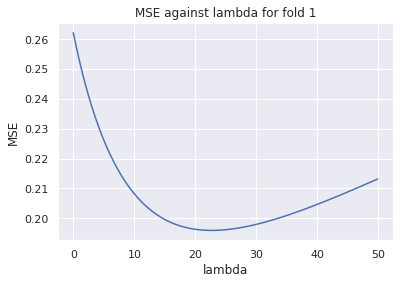

In [117]:
plt.figure
plt.plot(val_MSEs[0,:])
plt.title("MSE against lambda for fold 1")
plt.xlabel("lambda")
plt.ylabel("MSE") #scaled down

plt.xticks(np.linspace(0,400,6),[0,10,20,30,40,50])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

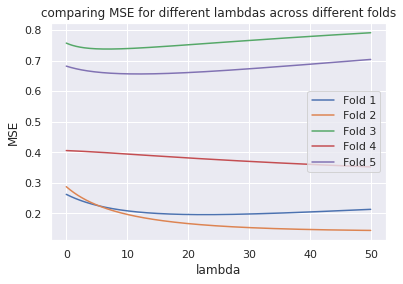

In [118]:
plt.figure
plt.title("comparing MSE for different lambdas across different folds")
plt.plot(val_MSEs[0,:],label="Fold 1")
plt.plot(val_MSEs[1,:], label="Fold 2")
plt.plot(val_MSEs[2,:], label="Fold 3")
plt.plot(val_MSEs[3,:], label="Fold 4")
plt.plot(val_MSEs[4,:], label="Fold 5")
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.xticks(np.linspace(0,400,6),[0,10,20,30,40,50])
plt.legend()
plt.show

There is large variation between the different folds. Though, this is expected to some degree when cross validating. Below we will calculated the optimum lambda value, but this value should be taken as an estimate with some degree of variability. note that the MSE has been scaled down, but the shape of the curve is accurate.

Text(0, 0.5, 'MSE')

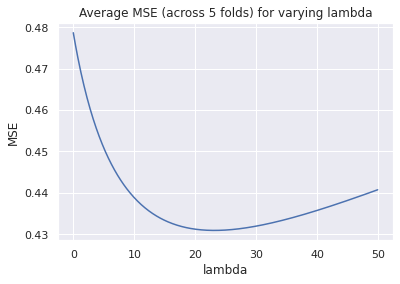

In [119]:
plt.plot(np.mean(val_MSEs, axis=0))
plt.title("Average MSE (across 5 folds) for varying lambda")
plt.xticks(np.linspace(0,400,6),[0,10,20,30,40,50])
plt.xlabel("lambda")
plt.ylabel("MSE")

In [120]:
mean_MSEs = np.mean(val_MSEs, axis=0) #mean across 5 folds
np.argmin(mean_MSEs) #index of minimum
opt_lamb = l[np.argmin(mean_MSEs)]
print('The optimum lambda value is',opt_lamb )

The optimum lambda value is 23.188320802005016


We find that the best overall Lambda is approximately 23. This is not too far from the optimum lambda value in fold 1, but does vary a bit from some of the other folds. It is a relatively large lambda value and again suggests that our data is hard to fit.

Next we check the distribution of errors

mean: -0.002905812700220227
standard deviation: 0.6697930305026015


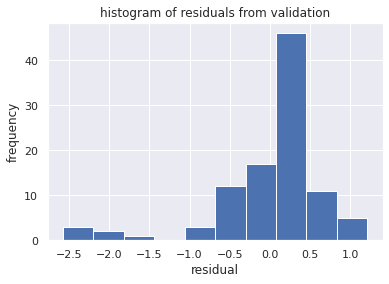

In [121]:
np.random.seed(25) #getting same seed so that cross val shuffle is still the same
data = standardise(reg_test.iloc[:,1:])

folds = cross_val_split(data, 5) #split data into shuffled folds
residz = np.zeros((5,20))

for i in range(len(folds)): #for each fold
    # define the training set
    train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0) #leave one out?
    train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1]) #merge back into 2d array
    X_train = train_folds[:,:-1] #all but last column are variables
    y_train = train_folds[:, -1] #last column is median salary response

    # define the validation set
    val_fold = folds[i] #call back the left out fold
    X_val = val_fold[:,:-1]
    y_val = val_fold[:, -1]

    W = ridge_estimate(X_train,y_train, penalty=opt_lamb) #calculate weights/betas
    prediccs = X_val@W
    ressys = prediccs - y_val
    residz[i,:] =ressys

res1d = np.reshape(residz,newshape=100)

plt.hist(res1d)
plt.title('histogram of residuals from validation')
plt.ylabel('frequency')
plt.xlabel('residual')

print('mean:',np.mean(res1d))
print('standard deviation:',np.std(res1d))


The distribution of errors follows some approximately gaussian shape. Though it it skewed a bit towards the positive side. 

One very important assumption we make when fitting linear or ridge regression models is that the residuals are standard normally distributed. We have a mean very close to 0, but a standard deviation of 0.67. The shape is approximately gaussian, so it is not entirely unreasonable to use linear regression methods on this dataset.

Below, we will now calculate in and out of sample MSE values when we retrain the whole dataset with this lambda parameter

In [122]:
#standardised datasets
X_train_std = standardise(reg_train.iloc[:,1:-1])
y_train_std = reg_train.iloc[:,-1]

betas_train = ridge_estimate(X_train_std,y_train_std,opt_lamb) #betas for train set, optimum lambda

mean = np.mean(reg_train.iloc[:,-1])
sd = np.std(reg_train.iloc[:,-1])

prediction = (X_train_std@betas_train)+mean #modify predict function later for unstandardise
residues= prediction - reg_train.iloc[:,-1]
MSE = np.mean(residues**2)

print('in sample MSE:',MSE)


in sample MSE: 24.66509099294769


In [123]:
X_val = standardise(reg_test.iloc[:,1:-1])

prediction = ((X_val@betas_train))+mean #recentre
residues= prediction - reg_test.iloc[:,-1]
MSE = np.mean(residues**2)
print('out of sample MSE:' ,MSE)

out of sample MSE: 26.071090433148218


We have a similar in sample MSE for ridge regression to linear regression. It is marginally worse than the linear regression in sample MSE, which is not too surprising; the ridge regression is used to avoid overfitting to the training set.

The out of sample MSE is marginally worse than the in sample MSE. It happens to be worse than the original linear regression out of sample prediction. This might seem a bit worrying at first since ridge is supposed to perform better for linear regression in the out of sample datasets. However, this is likely explained with the data being hard to fit, just as we found whilst performing the cross validating.

However, this result might also be explained with the fact that the means of the y values for the train and test data are quite different. We have standardised (centred) our y column so that the intercept could be taken as the mean and added back on later. This was done to avoid penalising the beta0 coefficient. Perhaps next time we could find another way to calculate the beta0 without penalising it in the ridge.

Overall, the ridge regression method is not great for this dataset. The MSE around 20 is a significant value when the mean of the predicted values is approximately 20.

In [124]:
mean2=np.mean(reg_test.iloc[:,-1])
print('mean of testing data y:',mean2)
print('mean of training data y:',mean)

#this is not the correct thing to do, since we are not supposed to know the test data mean,
#but is to demonstrate the difference there is if our training data mean was more representative to the test data mean.
prediction = ((X_val@betas_train))+mean2 #recentre
residues= prediction - reg_test.iloc[:,-1]
MSE = np.mean(residues**2)
print('different mean intercept out of sample MSE:' ,MSE) 

mean of testing data y: 20.60882352941177
mean of training data y: 23.018564356435643
different mean intercept out of sample MSE: 20.26423957972249


### KNN

Our final regression method will be using KNN. In this algorithm, we predict the response of an datapoint by calculating the euclidean distance between this datapoint and all the datapoints in our training set. We find the k nearest neighbours (points with the smallest euclidean distance) and average the response values from these neighbours.

In [125]:
#function to measure distance so we can find nearest neighbours
def euclidian_distance(p, q): #euclidean distance
    return np.sqrt(np.sum((p-q)**2, axis=1))



In [126]:
#returns an array containing the k nearest neighbours for each point in X_test when measured against X_train 
def k_neighbours(X_test, X_train, k=5, return_distance=False):
    n_neighbours = k
    dist = []
    neigh_ind = []
  
    # compute distance from each point x_text in X_test to all points in X_train 
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test] 

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)
  
    # return distances together with indices of k nearest neighbouts
    if return_distance:
        return np.array(dist), np.array(neigh_ind)

    return np.array(neigh_ind)

#using the neighbours from above, averages the response values that correspond to these neighbours, for each point in X_test
def knn_reg_predict(X_test, X_train, y_train, k=20):
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_test, X_train, k=k)
    # compute mean over neighbours labels

    y_pred = np.array([np.mean(y_train[neighbour]) for neighbour in neighbours]) 

    assert(y_pred.shape[0]==X_test.shape[0])
    
    return y_pred

The function below will perform cross validation for our KNN method. As a reminder, our cross validation will split our data into equal sized disjoint subsets of the original data. One subset is left out, and the model is trained on the rest of data. This is repeated for each subset and we will also vary the k that determines how many nearest neighbours we are averaging from. A larger k means that we will take into account a lot of datapoints, this can be effective if there are lots of datapoints close to point we are trying to predict.

KNN requires standardised data, this is so that the euclidean distance has a meaning. Otherwise, if different variables had different scales, then the distances would be skewed towards the variables with larger scales.
Fortunately, the dataset appears to be approximately standardised, so this time we decide we do not need to standardise it.

In [127]:
def cross_val_knn(data, num_folds, k, seed=25):
    
    np.random.seed(seed) #repeatable results
    
    #standardised
    
    
    folds = cross_val_split(data, num_folds) #split data into shuffled folds
    
    #preallocate spaces
    train_MSEs = np.zeros((num_folds,len(k))) #each row is a fold, each column is a k value
    val_MSEs = np.zeros((num_folds,len(k))) #to validate on later
    best_MSEs = float(np.inf)* np.ones(num_folds) #variable that stores best MSE to check if better parameter found
    neighbs = np.zeros((num_folds,data.shape[1])) #stores best neighbours for each fold
    best_k = np.zeros(num_folds) #stores best k for each fold

    for i in range(len(folds)): #for each fold
        print('Fold', i+1)
        # define the training set
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0) #leave one out?
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1]) #merge back into 2d array
        X_train = train_folds[:,:-1] #all but last column are variables
        y_train = train_folds[:, -1] #last column is median salary response
        
        val_fold = folds[i] #call back the left out fold
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1]
        
        for ki in range(len(k)):
            y_predi = knn_reg_predict(X_train, X_train, y_train, k=k[ki])
            train_MSE = np.mean((y_predi-y_train)**2)
            train_MSEs[i,ki] = train_MSE
            
            
            
            
            
            
            y_predo = knn_reg_predict(X_val, X_train, y_train, k=k[ki])

            val_MSE = np.mean((y_predo-y_val)**2)
            val_MSEs[i,ki] = val_MSE
            
            
            if val_MSE < best_MSEs[i]: #if MSE for this fold and lambda is better than any MSE of this fold
                best_MSEs[i] = val_MSE

                best_k[i] = k[ki]

            #print("MSE on validation set #{}: {}, k={}".format(i+1, val_MSE,k[ki]))
            
        print("Training finished for fold {}.".format(i+1))
        
    return best_k,val_MSEs,train_MSEs
            
            

We run our function with 5-fold cross validation and explore k values ranging from 1 to 20. We force the same seed as we used previously. This means the same random seed for the random shuffle that creates our cross validation subsets. So the results for our KNN are directly comparable with the ridge regression.

In [128]:
k = np.linspace(1,20,20,dtype=(int))

best_ks,val_MSEs,train_MSEs = cross_val_knn(reg_test,5,k)

Fold 1
Training finished for fold 1.
Fold 2
Training finished for fold 2.
Fold 3
Training finished for fold 3.
Fold 4
Training finished for fold 4.
Fold 5
Training finished for fold 5.


In [129]:
print('lowest MSE k values for each individual fold:',best_ks)

lowest MSE k values for each individual fold: [5. 2. 3. 2. 4.]


<function matplotlib.pyplot.show(close=None, block=None)>

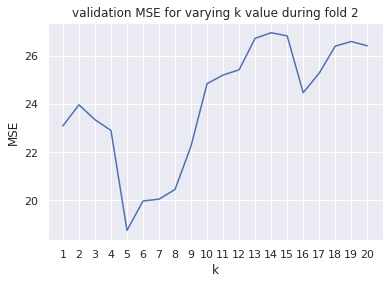

In [130]:
plt.figure
plt.plot(val_MSEs[0,:])
plt.title("validation MSE for varying k value during fold 2")
plt.xlabel("k")
plt.ylabel("MSE")
plt.xticks(np.arange(0,20,1),np.arange(1,21,1))
plt.show

Above is a graph to show that for fold 1, the lowest validation MSE was achieved with k=5.

Below, we calculate what k value had the best validation MSE, when averaged across all 5 folds.

In [131]:
#opt_k = int(np.mean(best_ks)) #average ks and round to nearest integer
mean_MSEs = np.mean(val_MSEs, axis=0) #mean across 5 folds
min(mean_MSEs)
opt_k = k[np.argmin(mean_MSEs)]
print('optimum k =',opt_k)


optimum k = 2


<function matplotlib.pyplot.show(close=None, block=None)>

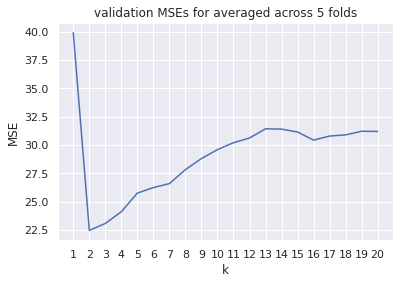

In [132]:
plt.figure
plt.plot(np.mean(val_MSEs, axis=0))
plt.xticks(np.arange(0,20,1),np.arange(1,21,1))
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("validation MSEs for averaged across 5 folds")
plt.show

This optimum k=2 value can be seen in the graph above.

A small value of 2 means that the best results are obtained when we predict y values by taking the two nearest neighbours. Unlike in ridge regression, which had vastly varying optimum parameter across different folds, we can be quite certain with our k value here. The lowest MSE K values were 5, 2, 3, 2, 4. These are a lot closer unlike the lambda parameter from earlier. We can even see in the plot below that small k values performed a lot better than large k values in each individual fold, not just the average that we have plotted above. 

The implication of this is that our predictions when using KNN are most accurate when we only average values from two nearest neighbours. This suggests that, if our data could be visualised in some 17 (number of features) dimensional space, then the data points are quite sparsely distributed. The points being relatively far away from each other would mean that averaging values from too many nearest neighbours would result in us considering some values that are very far away from the point we are trying to predict. In other words, the nearest neighbours are not that near. This results in an inaccurate estimate and bad MSE. 

This could also support our hypothesis on why the linear regression had a better MSE for the out of sample than the in sample; the data has so much variability.

Perhaps this gives us another angle on why the linear and ridge regressions did not fit models very well. To recap, both these models had MSEs around 20. 

The datapoints being so widely spread could also mean that the use of ridge regularisation is not that effective. This is because the points are so vastly spread that any regression line will struggle to fit most of the data, even if the beta coefficients are shrunk.

<function matplotlib.pyplot.show(close=None, block=None)>

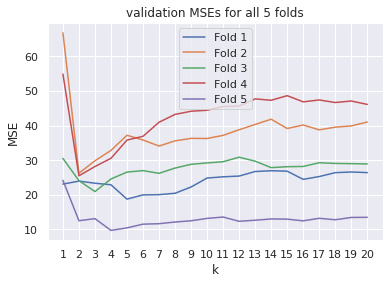

In [133]:
plt.figure
plt.plot(val_MSEs[0,:],label="Fold 1")
plt.plot(val_MSEs[1,:],label="Fold 2")
plt.plot(val_MSEs[2,:],label="Fold 3")
plt.plot(val_MSEs[3,:],label="Fold 4")
plt.plot(val_MSEs[4,:],label="Fold 5")
plt.xticks(np.arange(0,20,1),np.arange(1,21,1))
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("validation MSEs for all 5 folds")
plt.legend()
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

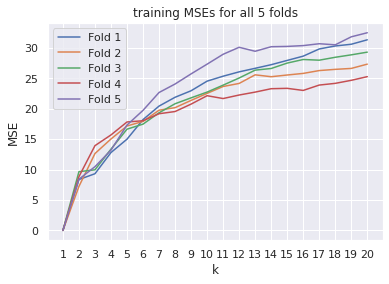

In [134]:
plt.figure
plt.plot(train_MSEs[0,:],label="Fold 1")
plt.plot(train_MSEs[1,:],label="Fold 2")
plt.plot(train_MSEs[2,:],label="Fold 3")
plt.plot(train_MSEs[3,:],label="Fold 4")
plt.plot(train_MSEs[4,:],label="Fold 5")
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("training MSEs for all 5 folds")
plt.xticks(np.arange(0,20,1),np.arange(1,21,1))
plt.legend()

plt.show

In [135]:
resids = yr_train - knn_reg_predict(np.asarray(xr_train),np.asarray(xr_train),np.asarray(yr_train),k=opt_k)
MSE = np.mean(resids**2)
print('KNN in sample MSE:',MSE)



resids = yr_test - knn_reg_predict(np.asarray(xr_test),np.asarray(xr_train),np.asarray(yr_train),k=opt_k)
MSE = np.mean(resids**2)
print('KNN out of sample MSE:',MSE)

KNN in sample MSE: 3.973725247524753
KNN out of sample MSE: 13.935808823529408


The MSE values for KNN are vastly better than the linear and ridge regression. The in sample MSE value being high is not that significant since KNN will always have small MSE when you choose k to be small. In fact, the in sample MSE will be 0 if k=1 (see graph above for the training MSEs during cross validation) since you are just taking the exact value as the prediction. 

Though the out of sample MSE being better than the linear and ridge is worth mentioning. It almost 50% of the other two methods' MSEs. 

With this result it is probably safe to conclude that the datapoints are sparse (when viewed in the full feature space). Thus it was not very suitable for linear or ridge regression methods, but is suitable for KNN.

In real life terms, this says that median house price does not have a very strong linear relationship to the features that we have been given in the dataset. Unfortunately, we do not have feature labels, so it is hard to hypothesise further. Though it is not unheard of for some houses to have many similar features, but a very different price. This is because some features are hard to quantify on a continuous scale. Examples of these could be location- we could measure distance from the city centre, but this isnt robust to cases like Canary Wharf in London, which has much cheaper housing surrounding it, despite being the same proximity to central London. Other variables that are hard to quantify are the aesthetics of the interior and exterior, if renovations have been done etc.

## Classification

In this next section, we will use classification algorithms to model data. This context is predicting whether a loan was given and the last column in the dataset below represents this result.

In [136]:
cls_test = pd.read_csv("/home/juser/Downloads/classification_test(1).csv",header=None) #load data
cls_train = pd.read_csv("/home/juser/Downloads/classification_train(1).csv",header=None) #no headers

cls_test.head()

#add column 1s

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.205882,0.50,0.069055,0.0,0.5,1.000000,0.333333,1.000000,0.232143,1.000000,1.0,1.0
1,0.382353,0.00,0.238418,0.0,0.5,0.333333,0.333333,0.000000,0.232143,0.666667,0.0,1.0
2,0.558824,1.00,0.208650,0.5,0.5,1.000000,1.000000,0.000000,0.303571,0.666667,1.0,1.0
3,0.338235,0.00,0.277484,0.0,0.0,0.333333,1.000000,0.333333,0.553571,0.666667,1.0,0.0
4,0.250000,0.75,0.115715,0.0,0.5,0.000000,1.000000,0.333333,0.500000,0.666667,0.0,1.0


### Logistic regression

Our first method is logistic regression. The logistic function is  
$$
f(x) = \frac{1}{1+e^{-x}}
$$

and we will apply this function to a predicted value like:

$$
\hat{\boldsymbol y}_{\text{log}} = f(\boldsymbol \beta^T \boldsymbol X + \beta_0)
$$

where we have estimated the betas

So that we have a binary classification and not some regression, we set a decision threshold. We round everything above this number to 1, and everything below to 0.

In [137]:
def logistic(x):
    return 1 / (1 + np.exp(-x)) #the sigmoid function

def predict_log(X, beta, beta_0):
    y_log = logistic(beta.T @ X + beta_0) #logistic of linear model
    return y_log

def initialise(d):
    """    
    Argument:
    d: size of the beta vector (or number of parameters)

    Returns:
    beta: initialised vector of shape (d, 1)
    beta_0: initialised scalar (corresponds to the offset)
    """

    beta = np.zeros(shape=(d, 1), dtype=np.float32)
    beta_0 = 0

    assert(beta.shape==(d, 1)) #check betas
    assert(isinstance(beta_0, float) or isinstance(beta_0, int))

    return beta, beta_0

In [138]:
def propagate(X, y, beta, beta_0):
    """
    Arguments:
    X: data of size (d, n)
    y: true label vector of size (1, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar

    Returns:
    cost: negative log-likelihood cost for logistic regression
    dbeta: gradient of the loss with respect to beta
    dbeta_0: gradient of the loss with respect to beta_0
    """
    n = X.shape[1]
    y_log = predict_log(X, beta, beta_0)

    # cost function
    cost = (-1) * np.mean(np.multiply(y, np.log(y_log)) + np.multiply(1-y, np.log(1 - y_log)), axis=1) 

    # derivatives
    dbeta = (1/n) * X @ np.transpose(y_log - y)  
    dbeta_0 =  np.mean((y_log - y)) 

    assert(dbeta.shape==beta.shape)
    assert(dbeta_0.dtype==float)
    cost = np.squeeze(cost)
    assert(cost.shape==())

    # store gradients in a dictionary, useful so we can call dbeta and dbeta0 separately
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0} 

    return grads, cost

def optimise(X, y, beta, beta_0, num_iterations=5000, learning_rate=0.005, print_cost=False):
    """
    Arguments:
    X: data of size (d, n)
    y: true label vector of size (1, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar
    num_iterations: number of iterations gradient descent shall update the parameters
    learning_rate: step size in updating procedure
    print_cost: whether to print the cost every 100 iterations or not

    Returns:
    params: dictionary containing the parameters beta and offset beta_0
    grads: dictionary containing the gradients
    costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
    """
    costs = []

    for i in range(num_iterations):

        # calculate cost and gradients
        grads, cost = propagate(X, y, beta, beta_0)  

        # retrieve derivatives from grads
        dbeta = grads["dbeta"] #call from dict
        dbeta_0 = grads["dbeta_0"]

        # updating procedure
        beta = beta - learning_rate * dbeta  #gradient descent
        beta_0 = beta_0 - learning_rate * dbeta_0  

        # record the costs
        if i % 100 == 0:
            costs.append(cost)

        # print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("cost after iteration %i: %f" %(i, cost))

    # save parameters and gradients in dictionary
    params = {"beta": beta, "beta_0": beta_0}
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}

    return params, grads, costs

In [153]:
def log_predict(X_test, beta, beta_0,d_thresh=0.5):
    """
    Arguments:
    X_test: test data of size (d, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar

    Returns:
    y_pred: vector containing all binary predictions (0/1) for the examples in X_test
    """
    n = X_test.shape[1]
    y_pred = np.zeros((1,n))
    beta = beta.reshape(X_test.shape[0], 1)

    # compute vector y_log predicting the probabilities
    y_log = predict_log(X_test, beta, beta_0)

    for i in range(y_log.shape[1]):

        # convert probabilities y_log to actual predictions y_pred
        if y_log[0, i] > d_thresh: #adjustable decision threshhold
            y_pred[0, i] = 1 
        else:
            y_pred[0, i] = 0  

    assert(y_pred.shape==(1, n))

    return y_pred
#calculate betas elsewhere?

def log_model(X_train, y_train, X_test, y_test, d_thresh, num_iterations=5000, learning_rate=0.5, print_cost=False,print_acc=False):
    # initialize parameters with zeros
    beta, beta_0 = initialise(X_train.shape[0])

    # gradient descent
    parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, num_iterations, learning_rate, print_cost=False)

    # retrieve parameters beta and beta_0 from dictionary "parameters"
    beta = parameters["beta"]
    beta_0 = parameters["beta_0"]

    # predict test and train set examples
    y_pred_test = log_predict(X_test, beta, beta_0,d_thresh)
    y_pred_train = log_predict(X_train, beta, beta_0,d_thresh)

    # print train/test Errors
    if print_acc==True:
        print("train mean accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
        print("test mean accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    # saving all information
    d = {"costs": costs, "y_pred_test": y_pred_test, "y_pred_train": y_pred_train, "beta": beta, "beta_0": beta_0, "learning_rate": learning_rate, "num_iterations": num_iterations}

    return d

In [143]:
def cross_val_log(data, l_rates, d_threshs, num_folds=5, num_iterations=5000,seed=25):
    
    np.random.seed(25)
    
    folds = cross_val_split(data, num_folds) #split data into shuffled folds
    
    #preallocate spaces
    train_accs = np.zeros((num_folds,len(l_rates),len(d_threshs))) #each row is a fold, each column is a lambda value
    
    val_accs = np.zeros((num_folds,len(l_rates),len(d_threshs))) #to validate on later
    best_accs = float(np.inf)* np.ones(num_folds) #variable that stores best acc to check if better parameters found
    best_d = np.zeros(num_folds) #stores best threshold for each fold
    best_l = np.zeros(num_folds) #stores best learning rate for each fold

    for i in range(len(folds)): #for each fold
        print('Fold', i+1)
        # define the training set
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0) #leave one out?
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1]) #merge back into 2d array
        X_train = train_folds[:,:-1] #all but last column are variables
        y_train = train_folds[:, -1] #last column is median salary response
        
        val_fold = folds[i] #call back the left out fold
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1] #last column is response
        
        
        X_train= X_train.T
        X_val = X_val.T
        
        for dt in range(len(d_threshs)):#for each decision threshold
            for lr in range(len(l_rates)): #for each learning rate
                
                d = log_model(X_train,y_train,X_val,y_val,d_threshs[dt],num_iterations,l_rates[lr],)
                #X_test
                test_acc = 100 - np.mean(np.abs(d["y_pred_test"] - y_val)) * 100
                val_accs[i,lr,dt] = test_acc
                

                if test_acc < best_accs[i]: #if MSE for this fold and lambda is better than any MSE of this fold
                    best_accs[i] = test_acc
                    best_d[i] = d_threshs[dt]
                    best_l[i] = l_rates[lr]

                #print("accuracy on validation set #{}: {}, d={}, l={}".format(i+1, test_acc,d_threshs[dt],l_rates[lr]))
            
        print("Training finished for fold {}.".format(i+1))
        
    return best_d, best_l, val_accs 
            
    
    

The code below is quite slow. Given more time, there are definitely speed improvements to be found here. The use of two nested loops is the main culprit. The beta calculations are also independent of learning rate and if the code was rewritten, we could calculate the betas inside the first loop, and not the second loop.

In [144]:
l_rates= np.linspace(0.01,2,10) #set parameter ranges
d_threshs = np.linspace(0.1,0.9,9)

cvl = cross_val_log(cls_test,l_rates,d_threshs, num_iterations=1000) #cross val, less iterations to speed up grid search

Fold 1
Training finished for fold 1.
Fold 2
Training finished for fold 2.
Fold 3
Training finished for fold 3.
Fold 4
Training finished for fold 4.
Fold 5
Training finished for fold 5.


We have just explored a broad hyperparameter space and have a heatmap plot below to see where we can zone in to do a slightly more accurate hyperparameter optimisation.

[Text(0.5, 12.5, 'decision threshold'), Text(30.5, 0.5, 'learning rate')]

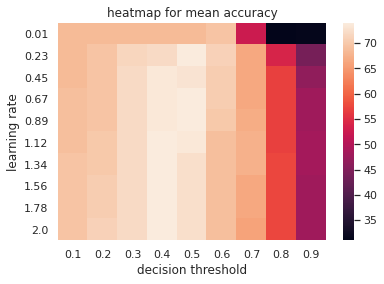

In [145]:
#plot
accplot = np.mean(cvl[2], axis=0) #this takes the mean accuracies across the 5 folds
plt.title("heatmap for mean accuracy")
xticks = np.ndarray.tolist(np.round(d_threshs,1)) #set ticks
yticks = np.ndarray.tolist(np.round(l_rates,2))
ax = sns.heatmap(accplot,xticklabels=xticks,yticklabels=yticks) #heatmap
ax.set(xlabel='decision threshold', ylabel='learning rate') 

We narrow down our grid search.

In [146]:
l_rates= np.linspace(0.1,1.3,10) #new parameter space
d_threshs = np.linspace(0.3,0.6,9) #smaller steps
cvl = cross_val_log(cls_test,l_rates,d_threshs, num_iterations=1000)


Fold 1
Training finished for fold 1.
Fold 2
Training finished for fold 2.
Fold 3
Training finished for fold 3.
Fold 4
Training finished for fold 4.
Fold 5
Training finished for fold 5.


[Text(0.5, 12.5, 'decision threshold'), Text(30.5, 0.5, 'learning rate')]

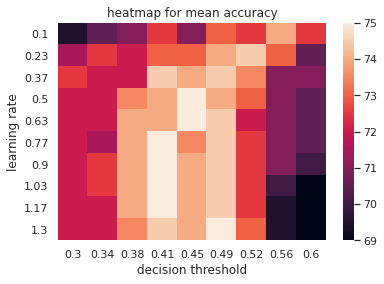

In [148]:
#second heatmap
accplot = np.mean(cvl[2], axis=0)
plt.title("heatmap for mean accuracy")
xticks = np.ndarray.tolist(np.round(d_threshs,2))
yticks = np.ndarray.tolist(np.round(l_rates,2))
ax = sns.heatmap(accplot,xticklabels=xticks,yticklabels=yticks)
ax.set(xlabel='decision threshold', ylabel='learning rate')

There happens to be a few combinations that each have a 75% accuracy. For learning rate we will take 0.9 since this is the median parameter for the combinations that reached 75% accuracy. For the decision threshold, we can tell our value is supposed to be closer to 0.5 than the extreme ends, but skewed slightly towards 0. This would suggest that we get a better accuracy if we lower our threshold at which a prediction is rounded up to a 1. 

Before we continue, we check how balanced our data is.

In [149]:
print('proportion of 1s:',sum(cls_test.iloc[:,11])/len(cls_test)) #count how many 1s in train data


proportion of 1s: 0.685


The dataset we have is a bit unbalanced; there are more 1s than 0s. So right now it is unclear if the below 0.5 threshold is effective because the data is unbalanced, or because the banks granting credit were a bit generous/greedy. 

So there is a chance that our cross validation has skewed us towards a smaller decision threshold since better accuracy can be found simply by predicting more 1s than 0s. Because of this, we will check both 0.45 and 0.41 below. Though, as far as our cross validated grid search goes, 0.41 looks to be the best parameter.


In [155]:
X_train = np.array(cls_train.iloc[:,:-1]).T #need to convert df into array and then transpose!
X_test = np.array(cls_test.iloc[:,:-1]).T

y_train = np.array(cls_train.iloc[:,-1]) #ys do not need transpose
y_test = np.array(cls_test.iloc[:,-1])

print('decision threshold:0.45')
d45 = log_model(X_train, y_train, X_test, y_test, d_thresh=0.45, num_iterations=5000, learning_rate=0.9, print_cost=False, print_acc=True)
print('decision threshold:0.41')
d41 = log_model(X_train, y_train, X_test, y_test, d_thresh=0.41, num_iterations=5000, learning_rate=0.9, print_cost=False, print_acc=True)

decision threshold:0.45
train mean accuracy: 75.0 %
test mean accuracy: 72.5 %
decision threshold:0.41
train mean accuracy: 73.125 %
test mean accuracy: 73.0 %


The results from both decision thresholds happen to be very similar. In fact, both happen to work well. 0.41 is marginally better. It has a worse training mean accuracy, but a better test mean accuracy. The test result is more important.

The next stage, we will use a random forest for classification.

The random forest works by taking multiple bootstrap (with replacement) samples of the data, and then training a decision tree on each sample. The splits on a classical decision tree are a greedy algorithm, and to improve upon this, our random forest will randomise at each split. It will only consider a subset of the features to split upon. Finally we have an ensemble of trees and we aggregate/average their prediction when given feature data.

To determine which variable, within this random subset, is best to split on, we use cross entropy:

$$\sum_{x \in X}p(x) log(p(x))$$

The functions below calculate cross entropy for us

In [156]:

#random forest
def cross_entropy(y, sample_weights=None):
    """ 
    Calculate the cross entropy for labels.
    Arguments:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (float): the gini impurity for y.
    """
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]

    entropy = 0 #change to zero
    num = y.shape[0]  # number of labels
    label_counts = {}  # caculate different labels in y，and store in label_counts
    for i in range(num):
        if y[i] not in label_counts.keys():
            label_counts[y[i]] = 0
        label_counts[y[i]] += sample_weights[i]

    for key in label_counts:
        prob = float(label_counts[key]) / float(np.sum(sample_weights))
        entropy -= prob * np.log(prob) #crossentropy
        
    #print('entropy',entropy)
    return entropy

def new_entropy(X, y, column, value, sample_weights=None):
    """
    Calculate the resulted gini impurity given a vector of features.
    Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      column: the column of the feature for calculating. 0 <= column < D
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (float): the resulted gini impurity after splitting by this feature.
    """
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]

    new_entropy = 0
    old_cost = cross_entropy(y, sample_weights)
    print('oc',old_cost)

    unique_vals = np.unique(X[:, column])
    new_cost = 0.0
    #split the values of i-th feature and calculate the cost 
    # for value in unique_vals:
    #     sub_X, sub_y, sub_sample_weights = split_dataset(X, y, column, value, sample_weights) #
    #     prob = np.sum(sub_sample_weights) / float(np.sum(sample_weights))
    #     new_cost += prob * cross_entropy(sub_y, sub_sample_weights) #
    
    for sub_X, sub_y, sub_sample_weights in split_dataset2(X, y, column, value, sample_weights):
        print('ssw',sub_sample_weights)
        prob = np.sum(sub_sample_weights) / float(np.sum(sample_weights))
        print('prob',prob)
        new_cost += prob * cross_entropy(sub_y, sub_sample_weights)
    
    print('nc',new_cost)
    new_entropy = old_cost - new_cost # information gain

    return new_entropy

The next set of functions are used to split the dataset. These work together by calculating the cross entropy for each feature on a subset of the features. Entropy is used so that we can find which feature has a lot of information, or disorder. We test our binary split on all the possible values in this feature vector and then split on the feature and value that gives us the biggest distinction between the resulting two groups.

In [157]:
def split_dataset2(X, y, column, value, sample_weights=None):
    region1 = []
    region2 = []
    featVec = X[:, column]  
    # We are removing the feature column from dataset (split), as before
    #X = X[:,[i for i in range(X.shape[1]) if i!=column]]  
    for i in range(len(featVec)):
        if featVec[i] <= value:
            region1.append(i)
        else:
          region2.append(i)     
    X1 = X[region1,:]
    y1 = y[region1]
    X2 = X[region2,:]
    y2 = y[region2]
    # returns list of splits
    if (sample_weights is None):
          return [(X1, y1), (X2, y2)]
    else:
          print('elsed', sample_weights)
          return [(X1, y1, sample_weights[region1]) , (X2, y2, sample_weights[region2])]


def choose_best_feature(X, y, max_features=None, sample_weights=None):
    """
    Choose the best feature to split according to criterion.
    Args:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (int): the column for the best feature
    """
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]
        
    if max_features is None: #non random forest
        features = np.arange(X.shape[1]) 
    else: #set max_features to number less than number of features 
        features = np.random.choice(np.arange(X.shape[1]),size=max_features, replace=False) #select without replacement features


    best_feature_idx = None # init random number
    value = None

    # use C4.5 algorirhm, modified for randomisation
    best_gain_cost = 0.0
    print('features',features)
    for i in range(len(features)):
        print('feature',i)
        unique_vals = np.unique(X[:,features[i]])
        for v in unique_vals:
            print('v',v)
            print('lens',X.shape,y.shape)
            info_gain_cost = new_entropy(X, y, features[i], v, sample_weights)  #calculating gini impurity for subset (not strict) of features        
            print('costs',info_gain_cost, best_gain_cost)
            print('true check',info_gain_cost >best_gain_cost)
            if info_gain_cost > best_gain_cost:
                best_gain_cost = info_gain_cost
                best_feature_idx = features[i]         #index for split feature and value        
                value = v
    print('cbf out', best_feature_idx)                
    return best_feature_idx,value

def majority_vote(y, sample_weights=None):
    """
    Return the label which appears the most in y.
    Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (int): the majority label
    """
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]

    majority_label = y[0]
    
    dict_num = {}
    for i in range(y.shape[0]):
        if y[i] not in dict_num.keys():
            dict_num[y[i]] = sample_weights[i]
        else:
            dict_num[y[i]] += sample_weights[i]

    majority_label = max(dict_num, key=dict_num.get)
    # end answer
    return majority_label


This next function builds a tree using the above functions. It is returned as dictionary.

In [158]:

def build_tree(X, y, feature_names, max_features, depth, sample_weights=None, max_depth=10, min_samples_leaf=2):
    """Build the decision tree according to the data.
    Args:
      X: (np.array) training features, of shape (N, D).
      y: (np.array) vector of training labels, of shape (N,).
      feature_names (list): record the name of features in X in the original dataset.
      depth (int): current depth for this node.
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (dict): a dict denoting the decision tree. 
      Example:
          The first best feature name is 'title', and it has 5 different values: 0,1,2,3,4. For 'title' == 4, the next best feature name is 'pclass', we continue split the remain data. If it comes to the leaf, we use the majority_label by calling majority_vote.
          mytree = {
              'titile': {
                  0: subtree0,
                  1: subtree1,
                  2: subtree2,
                  3: subtree3,
                  4: {
                      'pclass': {
                          1: majority_vote([1, 1, 1, 1]) # which is 1, majority_label
                          2: majority_vote([1, 0, 1, 1]) # which is 1
                          3: majority_vote([0, 0, 0]) # which is 0
                      }
                  }
              }
          }
    """
    if sample_weights is None:
        # if the sample weights is not provided, we assume the samples have uniform weights
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)
    
    mytree = dict()
    
    # include a clause for the cases where (i) no feature, (ii) all lables are the same, 
    # (iii) depth exceed, or (iv) X is too small

    if len(feature_names)==0 or len(np.unique(y))==1 or depth>=max_depth or len(X)<=min_samples_leaf: 
          mytree = { 'node':'leaf' ,  'label': majority_vote(y, sample_weights) }
    else:  
        best_feature_idx, value = choose_best_feature(X, y, max_features, sample_weights)
        print('best_feat',best_feature_idx)
        best_feature_name = feature_names[best_feature_idx]
        feature_names = feature_names[:]
        feature_names.remove(best_feature_name)
        splits = split_dataset2(X, y, best_feature_idx, value, sample_weights)
        mytree = { 'node':'split', 'feature_name':best_feature_name, 'value':value }
        # split[i] = (subX, sub_y, sub_sample_weight)
        mytree['left'] = build_tree(splits[0][0], splits[0][1], feature_names, max_features, depth+1, splits[0][2]) 
        mytree['right'] = build_tree(splits[1][0], splits[1][1], feature_names, max_features, depth+1, splits[1][2]) 

    return mytree


In [162]:
#def newpred()
#pred calls classpre calls class
#class hits tree
#classpre takes forest tree by 
#prob=[]
#for tree in forest
#prob.append(classify(x,tree))?
#mean?

In [164]:

def forest(data, num_trees, depth_trees, max_features, l_rates, seed=25, num_folds=5):
    #load data
    feature_names = data.columns.tolist()

    
    np.random.seed(25)#set seed for repeatability
    
    #split into 5 shuffled folds
    folds = cross_val_split(data, num_folds) 
    
    #preallocate spaces
    #train_accs = np.zeros((num_folds,len(l_rates),len(d_threshs))) #each row is a fold, each column is a lambda value
    
    #val_accs = np.zeros((num_folds,len(l_rates),len(d_threshs))) #to validate on later
    best_accs = float(np.inf)* np.ones(num_folds) #variable that stores best acc to check if better parameters found
    best_d = np.zeros(num_folds) #stores best threshold for each fold
    best_l = np.zeros(num_folds) #stores best learning rate for each fold
    final_trees =[]

    for i in range(len(folds)): #for each fold
        print('Fold', i+1)
        # define the training set
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0) #leave one out?
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1]) #merge back into 2d array
        X_train = train_folds[:,:-1] #all but last column are variables
        y_train = train_folds[:, -1] #last column is median salary response
        
        val_fold = folds[i] #call back the left out fold
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1] #last column is response
        
        N=len(X_train) #size of a single cross val training set (array rows)
        
        agg_trees = []

        for nt in range(num_trees): #for each tree
            #bootstrap aggregate
            boot_i = np.random.randint(0,N-1,N) #index for bootstrap
            X_train_bs = X_train[[boot_i],:][0] #bootstrap sample from x_train, [0] to select 2d array
            y_train_bs = y_train[boot_i] #corresponding y labels
            
            for dt in range(depth_trees):
                for mf in range(max_features):
                    tree = build_tree(X_train_bs,y_train_bs,feature_names, max_features=(mf+1), depth = (dt+1))
    

Unfortunately, we were unable to finish our random forest algorithm.

For an example of a confusion matrix, please see the mastery material where a confusion matrix is plotted and discussed for the sigmoid soft margin SVM.

## SVM

The last of our methods for this coursework will be support vector machines.

Our first attempt will be using a standard linear SVM with a hard margin. Our algorithm is looking for a vector of weights w and an scalar b. These define a hyperplane $$x \cdot w +b =0$$

This hyperplane will attempt to divide our data into two separate classes.

This method iterates many times to try and find a plane that maximises the distances between the datapoints and the plane. This means that we have found a plane that cuts through the data in a direction nomrmal to where the two classes can be seen to be as far apart as possible. 

We first define hinge loss as $$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, 1-y_i (\boldsymbol w \cdot x_i + b) \bigg) \, .
$$


where $\boldsymbol w$ is the vector of weights, $\lambda$ the regularisation parameter, and $b$ the intercept which is included in our `X` as an additional column of $1$'s.

Stochastic gradient descent updates weights with learning rate $\alpha$ and the learning happens according to:

$$
\boldsymbol w = \boldsymbol w - \alpha \frac{\partial \mathcal L}{\partial \boldsymbol w}
$$

where $\frac{\partial \mathcal L}{\partial \boldsymbol w}$ is the gradient of the hinge loss we have computed in the previous cell.

In [165]:
def compute_cost(W, X, y, regul_strength=1e5):
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))  #dot product
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * (np.sum(distances) / n)  ##

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge
    return cost



def calculate_cost_gradient(W, X_batch, y_batch, regul_strength=1e5):
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = W
        else:
            di = W - (regul_strength * y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(y_batch)  # average
    return dw

# stochastic gradient descent, regul strength 1000000, 0.5
def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf

    # stochastic gradient descent
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle([X, y])
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, y[ind], regul_strength) ## <-- SOLUTION
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost(weights, X, y, regul_strength)  #add sigma later
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights

            prev_cost = cost
            nth += 1

    return weights



This function below calculates F1 score, which is what we are using instead of accuracy.

F1 score is defined as $$2 \cdot \frac{precision \cdot recall}{precision + recall}$$

Where precision is the proportion of true positives (tp) out of predicted positives and recall is the proportion of true positives out of all actual positives. This score is useful and will add a penalty to models that happen to predict a lot of true positives just because the dataset is unbalanced in favour of these results.

and can be simplifed to $$\frac{tp}{tp + 0.5(fp + fn)} $$ https://en.wikipedia.org/wiki/F-score#Definition

In [166]:
def score(W, X, y): #F1 score
    y_preds = np.array([])
    for i in range(X.shape[0]):
        y_pred = np.sign(np.dot(X[i], W))
        y_preds = np.append(y_preds, y_pred)
  
    return np.float(sum(y_preds==y)) /(sum(y_preds==y) + 0.5*(sum(y_preds!=y))) # f1 score

Now we cross validate and measure the performance of our linear SVM on the training data. We have set regularisation strength to be a large 1e4. This is an approximate way of setting a hard margin.

In [177]:
## EDIT THIS FUNCTION
def cross_val_svm_old(data, num_folds,seed=10):
  
    np.random.seed(seed)
    
    folds = cross_val_split(data, num_folds)

    train_scores = []
    val_scores = []

    for i in range(len(folds)):#for each fold
        print('Fold', i+1)
        # define the training set
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        #X_train = train_folds[:,:-1]
        X_train = standardise(train_folds[:,:-1])
        X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))

        
        y_train = train_folds[:, -1]
        y_train[y_train==0] = -1.0 #turn 10 to 1,-1
        y_train = y_train.astype(float)
        
        
        # define the validation set
        val_fold = folds[i]
        #X_val = val_fold[:,:-1]
        X_val = standardise(val_fold[:,:-1])
        X_val = np.hstack((X_val,np.ones((X_val.shape[0],1)))) #add an intercept column

        
        y_val = val_fold[:, -1]
        y_val[y_val==0] = -1.0 #turn 0 to -1
        y_val = y_val.astype(float)

        #explore grid search
        
        # train the model
        W = sgd(X_train, y_train, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-3, regul_strength=1e4)
        print("Training finished.")

        # evaluate
        train_score = score(W, X_train, y_train)
        val_score = score(W, X_val, y_val)
        print("F1 score on train set #{}: {}".format(i+1, train_score))
        print("F1 score on validation set #{}: {}".format(i+1, val_score))

        train_scores.append(train_score)
        val_scores.append(val_score)

    return train_scores, val_scores

In [178]:


lin_train,lin_val = cross_val_svm_old(cls_test, 5,seed=25)

print('training F1 score average:', np.mean(lin_train))
print('validating F1 score average:', np.mean(lin_val))

Fold 1
Training finished.
F1 score on train set #1: 0.754863813229572
F1 score on validation set #1: 0.8235294117647058
Fold 2
Training finished.
F1 score on train set #2: 0.714859437751004
F1 score on validation set #2: 0.6440677966101694
Fold 3
Training finished.
F1 score on train set #3: 0.7301587301587301
F1 score on validation set #3: 0.7301587301587301
Fold 4
Training finished.
F1 score on train set #4: 0.7250996015936255
F1 score on validation set #4: 0.6885245901639344
Fold 5
Training finished.
F1 score on train set #5: 0.8732394366197183
F1 score on validation set #5: 0.6440677966101694
training F1 score average: 0.75964420387053
validating F1 score average: 0.7060696650615419


In [179]:
X_train = standardise(np.asarray(cls_train.iloc[:,:-1]))
y_train = np.asarray(cls_train.iloc[:,-1])
X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))


X_val = standardise(np.asarray(cls_test.iloc[:,:-1]))
y_val = np.asarray(cls_test.iloc[:,-1])
X_val = np.hstack((X_val,np.ones((X_val.shape[0],1))))

y_train[y_train==0] = -1.0 #turn 10 to 1,-1
y_train = y_train.astype(float)


y_val[y_val==0] = -1.0 #turn 0 to -1
y_val = y_val.astype(float)


W = sgd(X_train, y_train, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-3, regul_strength=1e4)



In [180]:


train_score = score(W, X_train, y_train)

val_score = score(W, X_val, y_val)

print('train and validation F1 scores:',train_score,val_score)


train and validation F1 scores: 0.7654320987654321 0.7692307692307693


With average training and validation F1 scores of around 0.76, the linear SVM with a hard margin has already performed quite well. 

Our next step is to modify our kernel and use a gaussian radial basis function:
$$k(\boldsymbol x,\boldsymbol y) = e^{\frac{-||\boldsymbol x-\boldsymbol y||^2}{\sigma}} $$

This means we are projecting our problem (our data points) into a higher dimension space. It will be beneficial if the problem we are trying to solve is non linear.

We will redefine the hinge loss functions below by using the rbf function in place of the previous dot products from the linear polynomial kernel.

Also important is the new partial derivative of the hinge loss function with respect to the weights vector.
This is now
$$ \boldsymbol w - \frac{\lambda}{n}(\frac{2}{\sigma} (x - \boldsymbol  w) \cdot \boldsymbol  1 * e^{\frac{-||\boldsymbol x-\boldsymbol w||^2}{\sigma}}) $$

In [167]:
def rbf(x,w,sigma):#radial basis function kernel
    return np.exp((-(np.linalg.norm(x-w))**2) / sigma)
    

# calculate gradient of cost with rbf
def compute_cost2(W, X, y, sigma, b, regul_strength=1e5):
    """
    W weights; X, y, data; sigma, rbf sd; b, intercept; regul_strength chooses hard margin
    """
    n = X.shape[0]
    distances = 1 - y * (rbf(X, W,sigma)+b)  ## <-- kernel trick
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * (np.sum(distances) / n)  

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge
    return cost



def calculate_cost_gradient2(W, X_batch, y_batch, sigma, b, regul_strength=1e5,):
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * rbf(X_batch, W,sigma) +b) #add intercept and need to remove ones column
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = W #
        else: #new gradient with rbf
            CHUNGUS = (2/sigma)*(X_batch[ind]-W) * rbf(X_batch[ind],W,sigma) #partial derivative of hinge loss, not adding b
 
            di = W - (y_batch[ind] * regul_strength)*CHUNGUS
        dw += di

    dw = dw/len(y_batch)  # average, we have counted W n times
    return dw

def sgd2(X, y, sigma, b, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e4, print_outcome=False):
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf

    # stochastic gradient descent
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle([X, y])
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient2(weights, x, y[ind], sigma,b, regul_strength) ## <-- SOLUTION
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost2(weights, X, y, sigma,b, regul_strength)  ## <-- SOLUTION
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights

            prev_cost = cost
            nth += 1

    return weights



def score2(W, X, y,sigma,b,preds=False): #F1 score
    y_preds = np.array([])
    for i in range(X.shape[0]):
        y_pred = np.sign(rbf(X[i], W,sigma)+b)
        y_preds = np.append(y_preds, y_pred)
    #print(y_preds)
    if preds==False:
        return np.float(sum(y_preds==y)) /(sum(y_preds==y) + 0.5*(sum(y_preds!=y))) # f1 score
    elif preds == 'raw':
        y_raws = np.array([])
        for i in range(X.shape[0]):
            y_raws = np.append(y_raws,rbf(X[i], W,sigma)+b)
        return y_raws
    else:
        return np.float(sum(y_preds==y)) /(sum(y_preds==y) + 0.5*(sum(y_preds!=y))), y_preds #f1 score and predictions
        


A modified cross val function that searches the kernel parameter sigma.

In [168]:


def cross_val_svm_rbf(data, num_folds,sigmas,bs,seed):
  
    np.random.seed(seed)
    
    folds = cross_val_split(data, num_folds)

    train_scores = np.zeros((num_folds,len(sigmas),len(bs)))
    val_scores = np.zeros((num_folds,len(sigmas),len(bs)))

    for i in range(len(folds)):#for each fold
        print('Fold', i+1)
        # define the training set
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        #X_train = train_folds[:,:-1]
        X_train = standardise(train_folds[:,:-1])
        #X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))

        
        y_train = train_folds[:, -1]
        y_train[y_train==0] = -1.0 #turn 10 to 1,-1
        y_train = y_train.astype(float)
        
        
        # define the validation set
        val_fold = folds[i]
        #X_val = val_fold[:,:-1]
        X_val = standardise(val_fold[:,:-1])
        #X_val = np.hstack((X_val,np.ones((X_val.shape[0],1)))) #add an intercept column

        
        y_val = val_fold[:, -1]
        y_val[y_val==0] = -1.0 #turn 0 to -1
        y_val = y_val.astype(float)

        #explore grid search
        for si in range(len(sigmas)): #sigma index
            for bi in range(len(bs)):
                # train the model
                W = sgd2(X_train, y_train, sigmas[si], bs[bi], max_iterations=1025, stop_criterion=0.01, learning_rate=1e-3, regul_strength=1e4)
                #print("Training finished.")

                # evaluate
                train_score = score2(W, X_train, y_train,sigmas[si],bs[bi])
                val_score = score2(W, X_val, y_val,sigmas[si],bs[bi])
                #print("F1 score on train set #{}, sigma={}: {}".format(i+1,sigmas[si], train_score))
                #print("F1 score on validation set #{}sigma={}:, b={}, {}".format(i+1,sigmas[si],bs[bi], val_score))

                train_scores[i,si,bi]=train_score
                val_scores[i,si,bi] = val_score

    return train_scores, val_scores

In [169]:

ligmas = np.linspace(0.1,60,9)
bees = -np.linspace(0.01,2,10)

rbf_train1, rbf_val1 = cross_val_svm_rbf(cls_test, 5,sigmas=ligmas,bs=bees,seed=10)



Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[Text(0.5, 12.5, 'sigma'), Text(30.5, 0.5, 'b')]

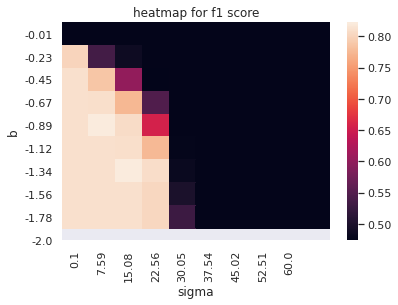

In [171]:
f1map = np.mean(rbf_val1, axis=0)
plt.title("heatmap for f1 score")
xticks = np.ndarray.tolist(np.round(ligmas,2))
yticks = np.ndarray.tolist(np.round(bees,2))
ax = sns.heatmap(f1map,xticklabels=xticks,yticklabels=yticks)
ax.set(xlabel='sigma', ylabel='b')


The plot above is a broad grid search in the parameter space (sigma and b). Though, we note that b and sigma are interlinked, a large sigma results in a smaller output from the RBF kernel function, since we end up taking the  exponential of a smaller negative number. The link between those two parameters are forced when we make predictions and add the negative b to the positive RBF output. So we will do our grid search again and choose large sigmas and small bs.

In [172]:

ligmas = np.linspace(0.1,420,10)
bees = -np.linspace(0.001,0.69,10)

rbf_train, rbf_val = cross_val_svm_rbf(cls_test, 5,sigmas=ligmas,bs=bees,seed=10)



Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[Text(0.5, 12.5, 'sigma'), Text(30.5, 0.5, 'b')]

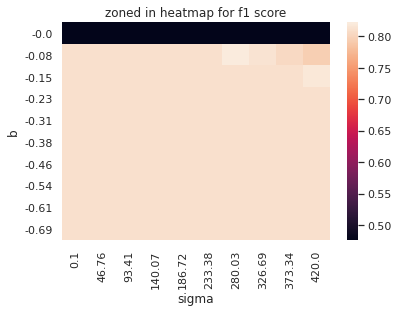

In [173]:
f1map = np.mean(rbf_val, axis=0)
plt.title("zoned in heatmap for f1 score")
xticks = np.ndarray.tolist(np.round(ligmas,2))
yticks = np.ndarray.tolist(np.round(bees,2))
ax = sns.heatmap(f1map,xticklabels=xticks,yticklabels=yticks)
ax.set(xlabel='sigma', ylabel='b')


We can see our optimum sigma (280) and beta (-0.08) as above and will use this to train the whole model.

In [175]:
opt_sig=280
opt_b = -0.08


X_train = standardise(np.asarray(cls_train.iloc[:,:-1]))
y_train = np.asarray(cls_train.iloc[:,-1])

X_val = standardise(np.asarray(cls_test.iloc[:,:-1]))
y_val = np.asarray(cls_test.iloc[:,-1])

y_train[y_train==0] = -1.0 #turn 10 to 1,-1
y_train = y_train.astype(float)

y_val[y_val==0] = -1.0 #turn 0 to -1
y_val = y_val.astype(float)

W = sgd2(X_train,y_train,opt_sig,opt_b)


train_score = score2(W, X_train, y_train,opt_sig,opt_b)

val_score = score2(W, X_val, y_val,opt_sig,opt_b,preds=1)

print('train and validation F1 scores:',train_score,val_score[0])


train and validation F1 scores: 0.826118855465884 0.8130563798219584


We have these F1 scores above. To recap, the F1 scores for the linear kernel were ~0.76. With the RBF, we have improved on this (~0.81), which suggests the problem we encounter has some non-linear elements to it and it was a good decision to try out this kernel.

However upon further examination, our model is not useful despite it's high F1 score. Somewhere along the optimisation, the model has discovered that it will predict better by just outputting 1s. If you trace back the predictions, you will see that there are some iterations during the grid search where 1s and -1s are being predicted. Unfortunately, we have not tunes this model well and it has converged into something not useful.

We will plot an ROC curve below. 

Text(0, 0.5, 'true positivity rate')

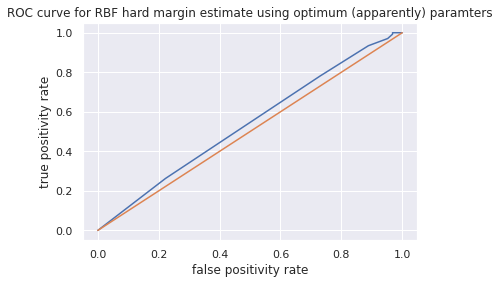

In [176]:
raw_rbf = score2(W, X_val, y_val,opt_sig,opt_b,preds='raw')


threshys= np.linspace(-1.5,0.5,100) #threshold to vary
roc1 = np.zeros((100,2)) #fill in results


for t in range(len(threshys)): #loop
    rawtopred = np.sign(raw_rbf + threshys[t]) #convert raw to 1 and -1
    tp = sum(np.multiply(rawtopred==1, y_val==1))
    tn = sum(np.multiply(rawtopred==-1, y_val==-1))
    fp = sum(np.multiply(rawtopred==1, y_val==-1))
    fn = sum(np.multiply(rawtopred==-1, y_val==1))
    #print(tp,tn,fp,fn)
    
    tpr = tp/(tp+fn) #recall, true pos rate
    fpr = fp/(tn+fp) #false neg rate
    roc1[t,:] = [tpr,fpr] #first column is y, second column is x
    
plt.plot(roc1[:,1],roc1[:,0])
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.title('ROC curve for RBF hard margin estimate using optimum (apparently) paramters')
plt.xlabel('false positivity rate')
plt.ylabel('true positivity rate')


The ROC curve is barely above the y=x line. This means that our model is marginally better than making random guesses. For a more interesting ROC curve, with more analysis, please see the ROC curve for the sigmoid kernel.

Lastly, we will be trying to use a sigmoid kernel and a soft margin to see if we can improve further on this F1 score.

The sigmoid kernel function is $$k(\boldsymbol x, \boldsymbol y) = tanh(\beta (\boldsymbol x \cdot \boldsymbol y) +c)   $$

We will rewrite some of the functions above but replace the rbf with this sigmoid kernel and recalculate the derivative of the hinge loss.




In [181]:
def sigmoid(x,w,beta,c):
    return np.tanh(beta *(np.dot(x,w)) +c)


# calculate gradient of cost with sigmoid
def compute_cost3(W, X, y, beta,c,b, regul_strength=1e-1):
    n = X.shape[0]
    distances = 1 - y * (sigmoid(X, W,beta,c) + b)  ## <-- kernel trick
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * (np.sum(distances) / n)  

    # calculate cost
    cost = 1 / 2 * sigmoid(W, W,beta,c) + hinge
    return cost



def calculate_cost_gradient3(W, X_batch, y_batch, beta,c,b, regul_strength=1e-1):
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (sigmoid(X_batch, W,beta,c)+b))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = W #equal to zero?
        else: #new gradient with rbf
            di = W - (regul_strength * y_batch[ind] * beta * X_batch[ind] * (1 - np.tanh(beta*np.dot(X_batch[ind],W) +c)**2))

        dw += di

    dw = dw/len(y_batch)  # average
    return dw

def sgd3(X, y, beta,c,b, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf

    # stochastic gradient descent
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle([X, y])
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient3(weights, x, y[ind], beta,c,b, regul_strength) #
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost3(weights, X, y, beta,c,b, regul_strength)  #
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights

            prev_cost = cost
            nth += 1

    return weights


def score3(W, X, y,beta,c,b,pred=False): #F1 score
    y_preds = np.array([])
    for i in range(X.shape[0]):
        y_pred = np.sign(sigmoid(X[i], W,beta,c)+b)
        y_preds = np.append(y_preds, y_pred)
    #print(y_preds)
    if pred==False:
        return np.float(sum(y_preds==y)) /(sum(y_preds==y) + 0.5*(sum(y_preds!=y))) # f1 score
    elif pred=='raw': # v inefficient, but not too slow, just to output raw values so we fcan plot ROC
        y_raws = np.array([])
        for i in range(X.shape[0]):
            y_raws = np.append(y_raws,sigmoid(X[i], W,beta,c)+b)
        return y_raws
    else:
        return np.float(sum(y_preds==y)) /(sum(y_preds==y) + 0.5*(sum(y_preds!=y))), y_preds



We rewrite a cross validation function and default the regul_strength parameter to a small number since this approximates a soft margin method.

In [182]:
def cross_val_svm_sgm(data, num_folds,betas,cs,b,seed=25,regul=1e4):
  
    np.random.seed(seed)
    
    folds = cross_val_split(data, num_folds)

    train_scores = np.zeros((num_folds,len(betas),len(cs)))
    val_scores = np.zeros((num_folds,len(betas),len(cs)))

    for i in range(len(folds)):#for each fold
        print('Fold', i+1)
        # define the training set
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        #X_train = train_folds[:,:-1]
        X_train = standardise(train_folds[:,:-1])
        #X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))

        
        y_train = train_folds[:, -1]
        y_train[y_train==0] = -1.0 #turn 10 to 1,-1
        y_train = y_train.astype(float)
        
        
        # define the validation set
        val_fold = folds[i]
        #X_val = val_fold[:,:-1]
        X_val = standardise(val_fold[:,:-1])
        #X_val = np.hstack((X_val,np.ones((X_val.shape[0],1)))) #no intercept column for these new kernels

        
        y_val = val_fold[:, -1]
        y_val[y_val==0] = -1.0 #turn 0 to -1
        y_val = y_val.astype(float)

        #explore grid search
        for bi in range(len(betas)): #beta index
            for ci in range(len(cs)): #c index
                # train the model
                W = sgd3(X_train, y_train, betas[bi], cs[ci],b, max_iterations=1025, stop_criterion=0.05, learning_rate=1e-3, regul_strength=regul)
                #print("Training finished.")

                # evaluate
                train_score = score3(W, X_train, y_train,betas[bi],cs[ci],b)
                val_score = score3(W, X_val, y_val,betas[bi],cs[ci],b)
                #print("F1 score on train set #{}, beta={}: {}".format(i+1,betas[bi], train_score))
                #print("F1 score on validation set #{}beta={}: {}".format(i+1,betas[bi], val_score))

                train_scores[i,bi,ci]=train_score
                val_scores[i,bi,ci] = val_score

    return train_scores, val_scores



Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[Text(0.5, 12.5, 'beta'), Text(30.5, 0.5, 'c')]

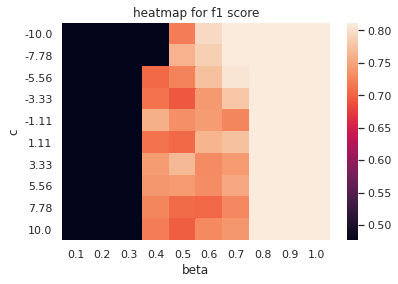

In [183]:
bois = np.linspace(0.1,1,10) #beta
crispys = np.linspace(-10,10,10) #c

sgm_train, sgm_val = cross_val_svm_sgm(cls_test, 5,betas=bois,cs=crispys,b=0, seed=10)



f1map = np.mean(sgm_val, axis=0)
plt.title("heatmap for f1 score")
xticks = np.ndarray.tolist(np.round(bois,2))
yticks = np.ndarray.tolist(np.round(crispys,2))
ax = sns.heatmap(f1map,xticklabels=xticks,yticklabels=yticks)
ax.set(xlabel='beta', ylabel='c')


This grid search tells us that the optimum beta parameter is beta>0.7 and that c is not particularly important. We can choose beta=1 and c=0 for paramters that maximise f1 score during this cross validation step

In [184]:
W = sgd3(X_train,y_train,1,0,0)


train_score = score3(W, X_train, y_train,1,0,0)

val_score = score3(W, X_val, y_val,1,0,0,pred=1)

print('train and test F1 scores:',train_score,val_score[0])

val_score[1] #this is our prediction




train and test F1 scores: 0.8489208633093526 0.8095238095238095


array([ 1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1

The F1 scores for this sigmoid kernel are slightly worse than that of the rbf. However, unlike the RBF kernel model, this model has not been tricked into just predicting 1s, which results in a high f1 score due to the unbalanced nature of the dataset.

This suggests that the sigmoid kernel is the most suitable kernel for this dataset and problem.

Next we will try this sigmoid kernel again, but with a soft margin. This is being accomplished by setting regul_strength to be small

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[Text(0.5, 12.5, 'beta'), Text(30.5, 0.5, 'c')]

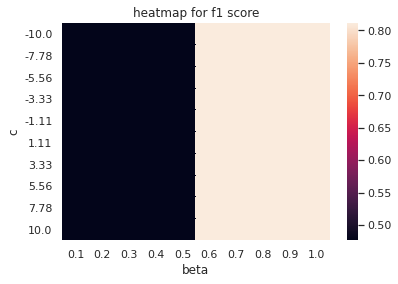

In [185]:
bois = np.linspace(0.1,1,10) #beta
crispys = np.linspace(-10,10,10) #c

sgm_train, sgm_val = cross_val_svm_sgm(cls_test, 5,betas=bois,cs=crispys,b=0, seed=10, regul=0.5)

f1map = np.mean(sgm_val, axis=0)
plt.title("heatmap for f1 score")
xticks = np.ndarray.tolist(np.round(bois,2))
yticks = np.ndarray.tolist(np.round(crispys,2))
ax = sns.heatmap(f1map,xticklabels=xticks,yticklabels=yticks)
ax.set(xlabel='beta', ylabel='c')



This heatmap is not very useful. Apparently taking any beta greater than 0.55 with any c value will give a great f1 score. Whilst, we believe that taking any of these values should give a reasonable result, it is not useful since we do not have a precise beta and c value to choose. We will go ahead with beta=0.7, c=0 and see what happens.

In [186]:
W = sgd3(X_train,y_train,1,0,0,regul_strength=0.5) #regul strength forces th soft margin


train_score = score3(W, X_train, y_train,0.7,0,0)

val_score = score3(W, X_val, y_val,1,0,0,pred=1)

print('train and test F1 scores:',train_score,val_score[0])

val_score[1] #this is our prediction, outputting it to show that it is not a useless model


train and test F1 scores: 0.8489208633093526 0.8269794721407625


array([-1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1

precision: 0.7468354430379747
recall: 0.8613138686131386


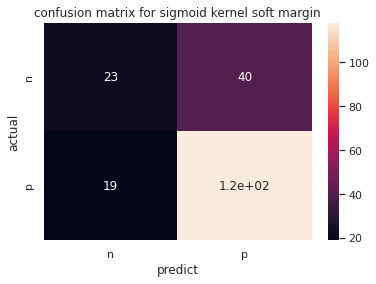

In [187]:
tp = sum(np.multiply(val_score[1]==1, y_val==1))
tn = sum(np.multiply(val_score[1]==-1, y_val==-1))
fp = sum(np.multiply(val_score[1]==1, y_val==-1))
fn = sum(np.multiply(val_score[1]==-1, y_val==1))

confmat = np.array([[tn,fp],[fn,tp]])

plt.title("confusion matrix for sigmoid kernel soft margin")
xticks = ['n', 'p']
yticks = ['n' , 'p']
ax = sns.heatmap(confmat,xticklabels=xticks,yticklabels=yticks,annot=True)
ax.set(xlabel='predict', ylabel='actual')


print('precision:',tp/(tp+fp))
print('recall:', tp/(tp+fn))


This confusion matrix shows that we lots of true positives and very few false negatives (our model is not biased to predicting 1s). The prediction of negatives was not as effective. In fact our negative prediction success rate is 50% since we have an equal number of TN and FN.

Fortunately, in this context, false negatives are not necessarily a bad thing. For a bank granting credit applications, these false negatives translate as: the bank does award credit to someone who should be elligible. This would mean lost business perhaps, but it is better than awarding credit to customer who will not pay back (false positive) their credit and this could cost the bank a lot. 

/home/juser/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/juser/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         inf         inf         inf         inf         inf         inf
         inf         inf         inf  5.05839416  5.51824818  7.35766423
 10.11678832  6.4379562   3.79379562  3.67883212  4.23065693  3.28467153
  3.81021898  3.67883212  3.62773723  2.95072993  2.93599102  2.66715328
  2.46157149  2.03649635  2.06934307  1.87620438  1.57883212  1.43211679
  1.48467153  1.45413297  1.35713014  1.31539637  1.23960647  1.23960647
  1.22627737  1.18642336  1.12794381  1.11557178  1.08394161  1.06492509
  1.0729927   1.06242134  1.06000247  1.04233577  1.02524829  1.02524829
  1.03278689  1.03278689  1.01612903  1.01612903  1.01612903  1.01612903
  1.01612903  1.01612903  1.01612903  1.01612903  1.01612903  1.
  1.          1.          1.          1.          1.       

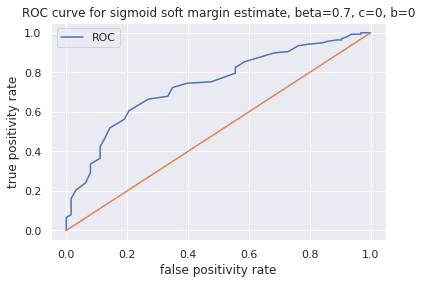

In [188]:
raws = score3(W, X_val, y_val,1,0,0,pred='raw')


threshs= np.linspace(-.02,0.02,100) #threshold to vary
roc = np.zeros((100,2)) #fill in results


for t in range(len(threshs)): #loop
    rawtopred = np.sign(raws + threshs[t]) #convert raw to 1 and -1
    tp = sum(np.multiply(rawtopred==1, y_val==1))
    tn = sum(np.multiply(rawtopred==-1, y_val==-1))
    fp = sum(np.multiply(rawtopred==1, y_val==-1))
    fn = sum(np.multiply(rawtopred==-1, y_val==1))
    #print(tp,tn,fp,fn)
    
    tpr = tp/(tp+fn) #recall, true pos rate
    fpr = fp/(tn+fp) #false neg rate
    roc[t,:] = [tpr,fpr] #first column is y, second column is x
    
plt.plot(roc[:,1],roc[:,0],label='ROC')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.title('ROC curve for sigmoid soft margin estimate, beta=0.7, c=0, b=0')
plt.xlabel('false positivity rate')
plt.ylabel('true positivity rate')
plt.legend()


maxi = roc[:,0]/roc[:,1]
print(maxi)
maxid= np.argmax(maxi[35:]) #ignore nans and infs

print('optimum thresh',threshs[35+maxid])

This ROC curve is far better than the one we had on our RBF model. The cruve is far away from the y=x line, which implies that we have good true positivity without having bad false positivity; we aren't just guessing 1s.


Using the soft margin has given us small increases in performance! The F1 score on the testing data is 0.81. Most notably, this prediction makes meaningful predictions (not just assuming 1 everywhere). See the confusion matrix above for a distribution of the predictions.

The precision is also very high, but the recall not as good. This means that our model has predicted -1 when the true value was 1. Our RBF kernel method will have a better recall, but that is because it predicts a lot more 1s, sometimes predicting all 1s, which actually makes our rbf SVM less useful than this sigmoid SVM. 

The soft margin allows some flexibility with predictions that are close to the hyperplane. This reduces overfitting and is likely the reason why our results have improved. In fact, you can see how adding the soft margin reduced the testing F1 score, but increased the training F1 score.

More interesting is the fact that the sigmoid kernel gave a more useful classifier than the rbf kernel. One way of seeing this is that classifying the data is a non linear problem, and that the sigmoid kernel is better suited to this non linear problem than the RBF. Another way of seeing this is that the data has some additional hidden features, that we can only see by projecting the features into a higher dimensional space. And the the sigmoid kernel is better at mapping our features into the hidden features.

To conclude, for our given dataset this soft margin sigmoid kernel has performed the best for the classification task.